In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import typing
import copy

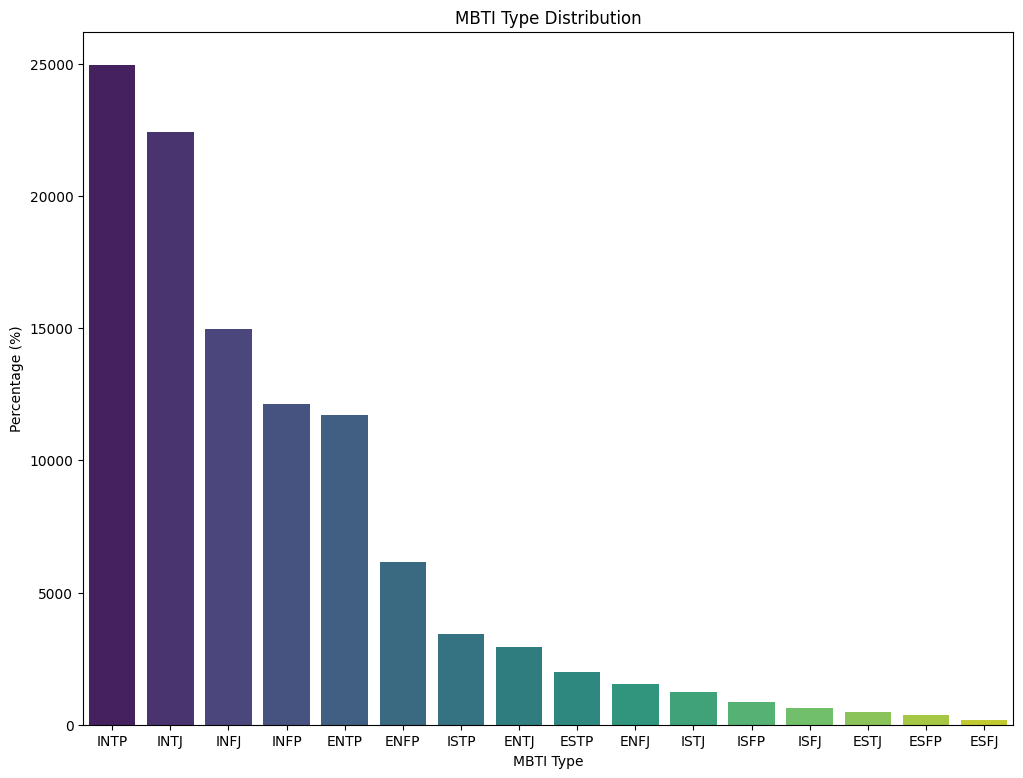

In [2]:
data = pd.read_csv('../dataset/MBTI_500.csv')
plt.figure(figsize=(12, 9))  
sns.barplot(x = data['type'].value_counts().index, y = data['type'].value_counts().values, palette = 'viridis')
plt.ylabel('Percentage (%)')
plt.xlabel('MBTI Type')
plt.title('MBTI Type Distribution')
plt.show()

In [3]:
data[data['type'] == 'ESFJ'].value_counts().sum()

181

In [4]:
# 해당 데이터셋에서 각 type의 개수를 2000개 이하로 하기, 2000개 이하인 것은 그대로 두기 
# 2000개 초과인 것은 2000개로 줄이기
def reduce_data(data: pd.DataFrame, max_count: int) -> pd.DataFrame:
    reduced_data = pd.DataFrame()
    for mbti_type in data['type'].unique():
        type_data = data[data['type'] == mbti_type]
        if len(type_data) > max_count:
            reduced_data = pd.concat([reduced_data, type_data.sample(max_count)])
        else:
            reduced_data = pd.concat([reduced_data, type_data])
    return reduced_data

reduced_data = reduce_data(data, 50) # 몇개 이하로 할 지 정하기 

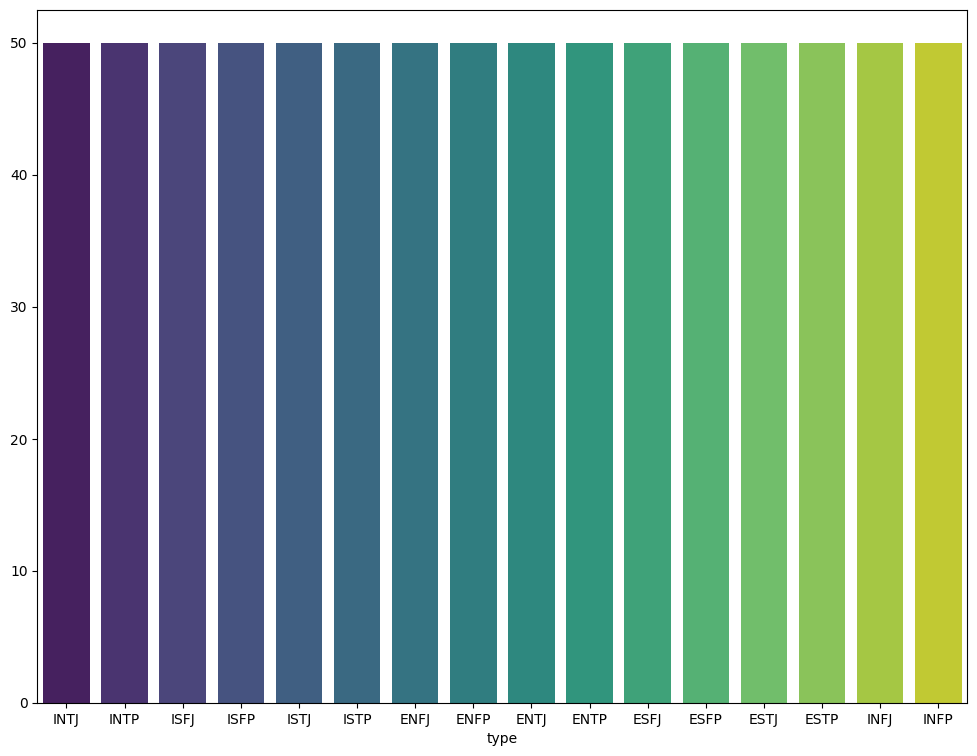

In [5]:
plt.figure(figsize=(12, 9))  
sns.barplot(x = reduced_data['type'].value_counts().index, y = reduced_data['type'].value_counts().values, palette = 'viridis')
plt.show()

In [6]:
reduced_data.to_csv('../dataset/reduced_data.csv', index=False)